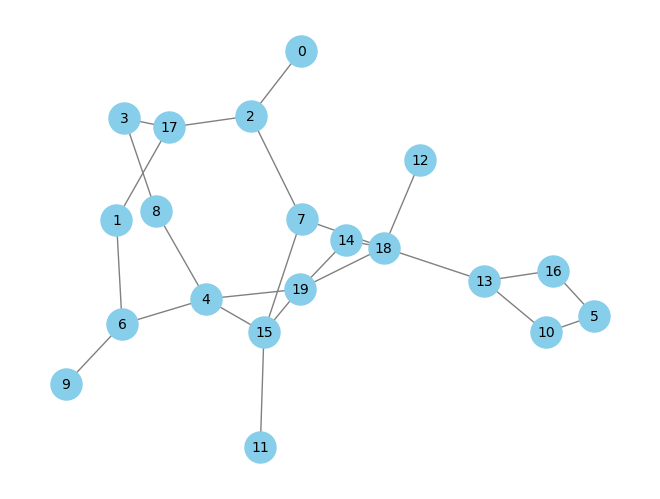

In [25]:
import networkx as nx

G = nx.erdos_renyi_graph(20, 0.15)
nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=10)

In [36]:
def find_isolated(g):
    isolated = []
    for i in list(g.nodes()):
        if g.degree(i) == 0:
            isolated.append(i)
    return isolated

def find_pendant(g):
    pendant = []
    for i in list(g.nodes()):
        if g.degree(i) == 1:
            p_vertex = {"idx": i, "neighbour_idx": list(G.neighbors(i))[0]}
            pendant.append(p_vertex)
    return pendant

def find_top(g,k):
    top = []
    for i in list(g.nodes()):
        if g.degree(i) > k:
            vertex = {"idx": i, "degree": g.degree(i)}
            top.append(vertex)
    return top
    

In [37]:
find_isolated(G)

[]

In [38]:
find_pendant(G)

[{'idx': 0, 'neighbour_idx': 2},
 {'idx': 9, 'neighbour_idx': 6},
 {'idx': 11, 'neighbour_idx': 15},
 {'idx': 12, 'neighbour_idx': 18}]

In [39]:
find_top(G, 4)

[{'idx': 18, 'degree': 5}]

In [42]:
import networkx as nx
import matplotlib.pyplot as plt
from ipywidgets import Button, HBox, VBox, Output
from IPython.display import display, clear_output

# Создаем граф
G = nx.erdos_renyi_graph(20, 0.15)
pos = nx.spring_layout(G)

# Функции для нахождения изолированных, подвесных и топовых вершин
def find_isolated(g):
    isolated = [i for i in g.nodes() if g.degree(i) == 0]
    return isolated

def find_pendant(g):
    pendant = [{"idx": i, "neighbour_idx": list(g.neighbors(i))[0]} for i in g.nodes() if g.degree(i) == 1]
    return pendant

def find_top(g, k):
    top = [{"idx": i, "degree": g.degree(i)} for i in g.nodes() if g.degree(i) > k]
    return top

# Функции для добавления и удаления подвесных и топовых вершин
def add_pendant(g):
    non_pendants = [node for node, degree in dict(g.degree()).items() if degree != 1]
    if non_pendants:
        node = non_pendants[0]
        neighbors = list(g.neighbors(node))
        if neighbors:
            g.remove_edge(node, neighbors[0])

def remove_pendant(g):
    pendants = [node for node, degree in dict(g.degree()).items() if degree == 1]
    if pendants:
        node = pendants[0]
        new_neighbor = max(g.nodes()) + 1
        g.add_edge(node, new_neighbor)

def add_top(g, k):
    non_tops = [node for node, degree in dict(g.degree()).items() if degree <= k]
    if non_tops:
        node = non_tops[0]
        for _ in range(k + 1):
            new_neighbor = max(g.nodes()) + 1
            g.add_edge(node, new_neighbor)

def remove_top(g, k):
    tops = [node for node, degree in dict(g.degree()).items() if degree > k]
    if tops:
        node = tops[0]
        neighbors = list(g.neighbors(node))
        for i in range(len(neighbors) - k):
            g.remove_edge(node, neighbors[i])

# Функция ядрообразования и визуализации
def kernelization_and_visualization(g, k):
    isolated = find_isolated(g)
    pendants = find_pendant(g)
    tops = find_top(g, k)

    color_map = []
    for node in g.nodes():
        if node in isolated:
            color_map.append('gray')
        elif any(p['idx'] == node for p in pendants):
            color_map.append('blue')
        elif any(t['idx'] == node for t in tops):
            color_map.append('red')
        else:
            color_map.append('green')

    plt.figure(figsize=(8, 6))
    nx.draw(g, pos, node_color=color_map, with_labels=True, edge_color='gray', node_size=500, font_size=10)
    plt.show()

# Интерфейс для управления графом
def update_graph(action):
    if action == 'add_pendant':
        add_pendant(G)
    elif action == 'remove_pendant':
        remove_pendant(G)
    elif action == 'add_top':
        add_top(G, 4)
    elif action == 'remove_top':
        remove_top(G, 4)
    with out:
        clear_output(wait=True)
        kernelization_and_visualization(G, 4)

# Создание кнопок
button_add_pendant = Button(description="Add Pendant")
button_remove_pendant = Button(description="Remove Pendant")
button_add_top = Button(description="Add Top")
button_remove_top = Button(description="Remove Top")

# Обработчики событий для кнопок
button_add_pendant.on_click(lambda x: update_graph('add_pendant'))
button_remove_pendant.on_click(lambda x: update_graph('remove_pendant'))
button_add_top.on_click(lambda x: update_graph('add_top'))
button_remove_top.on_click(lambda x: update_graph('remove_top'))

# Отображение интерфейса
out = Output()
buttons = HBox([button_add_pendant, button_remove_pendant, button_add_top, button_remove_top])
display(VBox([buttons, out]))

# Первоначальная визуализация графа
with out:
    kernelization_and_visualization(G, 4)
